In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('D:\DataSci\Resources\laptop_pricing_dataset_mod2.csv')
df.head(5)
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
df.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [7]:
from sklearn.linear_model import LinearRegression
lm_1 = LinearRegression()
X_1= df[['CPU_frequency']]
Y_1 = df["Price"]
lm_1.fit(X_1,Y_1)
print(f'Yhat = {float(lm_1.coef_)} X + {float(lm_1.intercept_)}')

Yhat = 1485.1936264779172 X + 253.6611706858214


C:\Users\Ojas\AppData\Local\Temp\ipykernel_19392\1461800015.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Yhat = {float(lm_1.coef_)} X + {float(lm_1.intercept_)}')


C:\Users\Ojas\AppData\Local\Temp\ipykernel_19392\390291970.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
C:\Users\Ojas\AppData\Local\Temp\ipykernel_19392\390291970.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

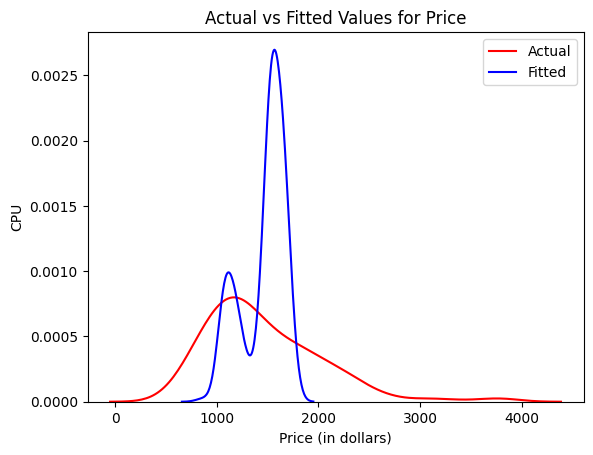

In [13]:
Y_hat_1 = lm_1.predict(X_1)



ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat_1, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('CPU')
plt.legend(['Actual','Fitted'])

plt.show()
plt.close()

In [21]:
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(Y_hat_1,Y_1)
print(mse_1)

print(lm_1.score(X_1,Y_1))

284583.4405868629
0.1344436321024326


In [23]:
X_1 = X_1.to_numpy().flatten()
f1 = np.polyfit(X_1, Y_1, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X_1, Y_1, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X_1, Y_1, 5)
p5 = np.poly1d(f5)

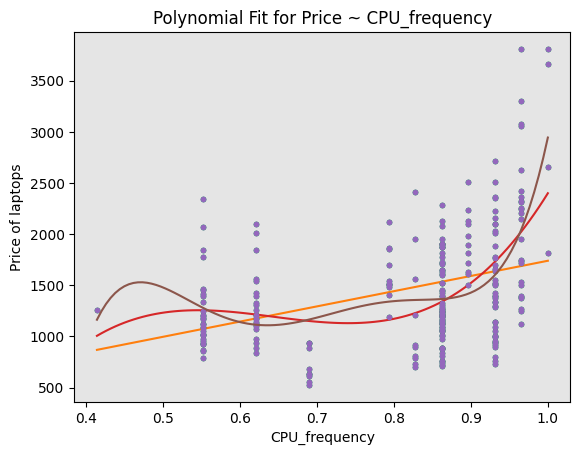

In [28]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
PlotPolly(p1, X_1, Y_1, 'CPU_frequency')
PlotPolly(p3, X_1, Y_1, 'CPU_frequency')
PlotPolly(p5, X_1, Y_1, 'CPU_frequency')

In [32]:
from sklearn.metrics import r2_score

In [35]:
r_squared_1 = r2_score(Y_1, p1(X_1))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y_1,p1(X_1)))
r_squared_3 = r2_score(Y_1, p3(X_1))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y_1,p3(X_1)))
r_squared_5 = r2_score(Y_1, p5(X_1))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y_1,p5(X_1)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653113
The MSE value for 3rd degree polynomial is:  241024.86303848765
The R-square value for 5th degree polynomial is:  0.3030822706443915
The MSE value for 5th degree polynomial is:  229137.29548053455


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

input = [('scaling', StandardScaler()), ('poly', PolynomialFeatures(include_bias=False)), ('lm', LinearRegression())]
pipe= Pipeline(input)


TypeError: float() argument must be a string or a real number, not 'builtin_function_or_method'